# Eclat

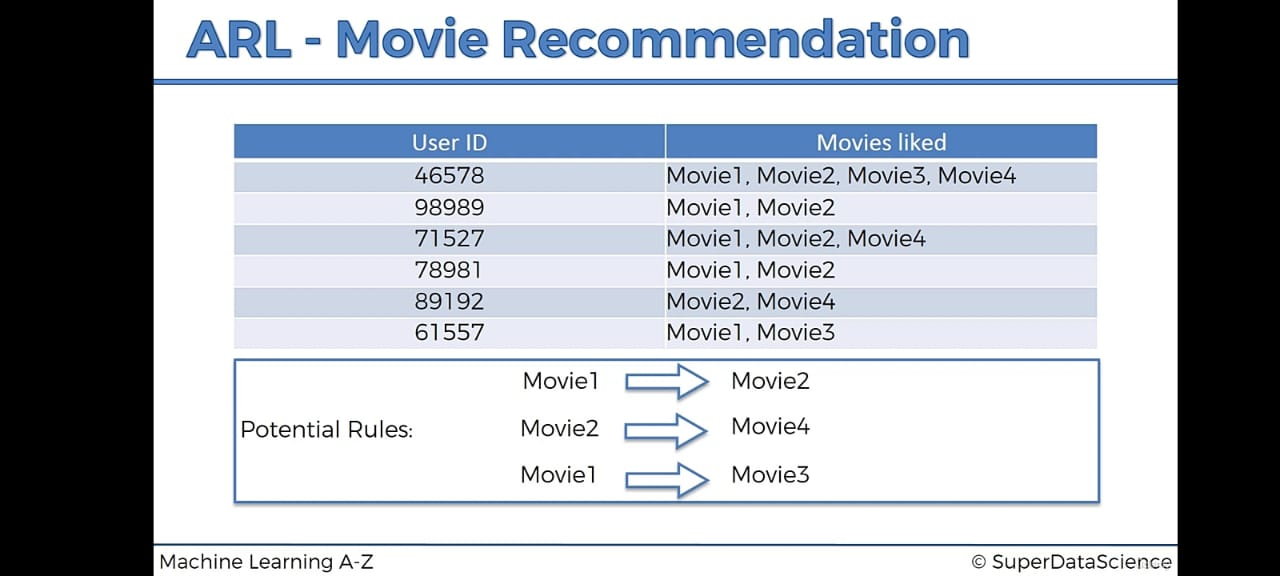

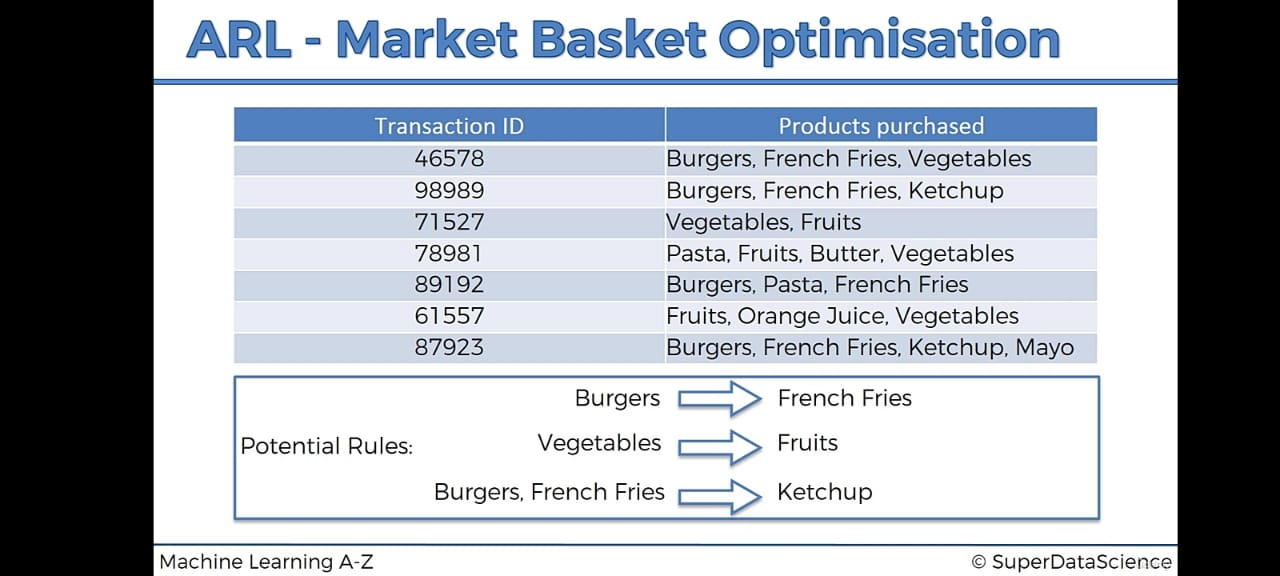

Eclat have only `support` factor.


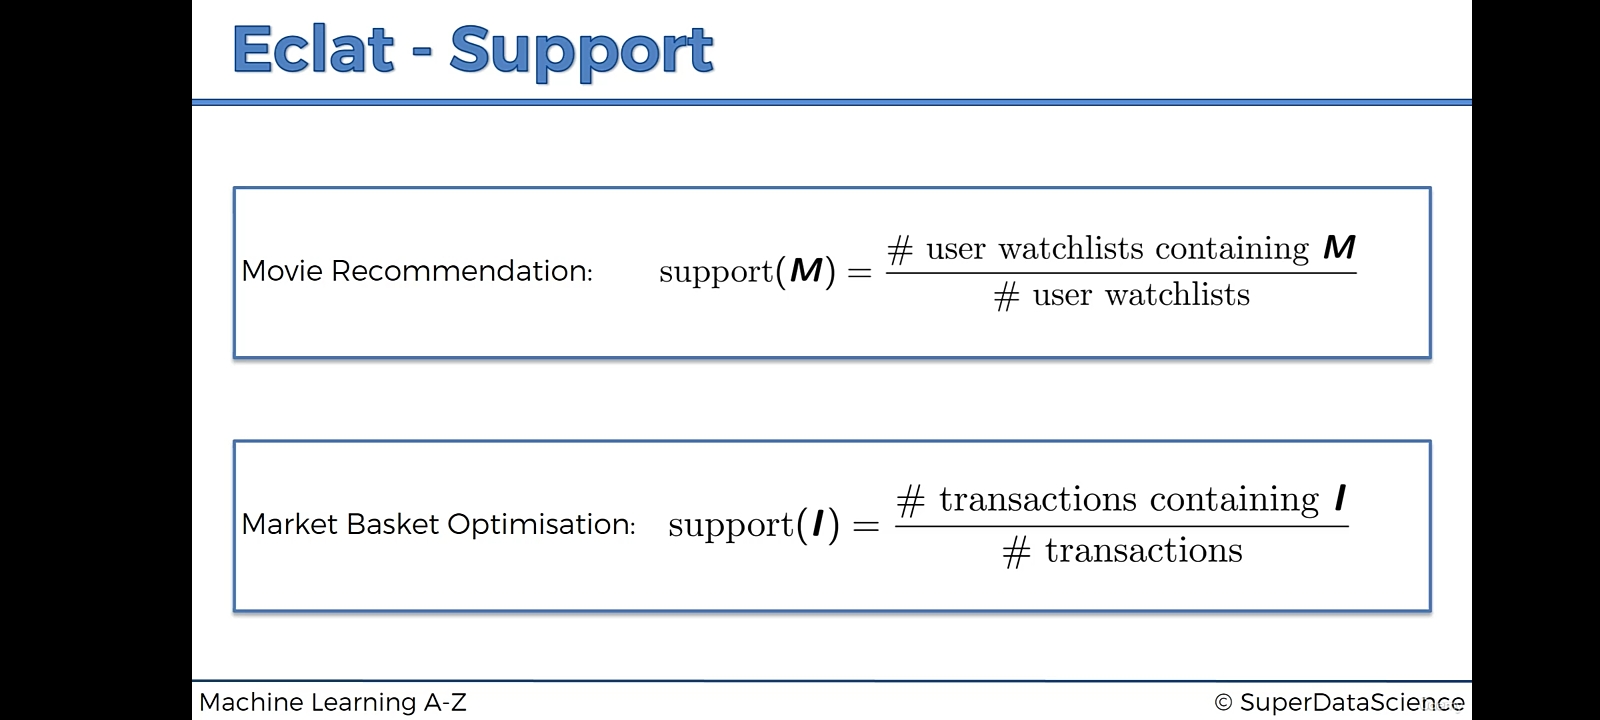

Here,  
`M` --> set of 2 or more movies.  
`I` --> set of 2 or more items.  

We can find how many `%` of people likes these two movies say `intersteller` and `X-machina`.



## Eclat Algorithm

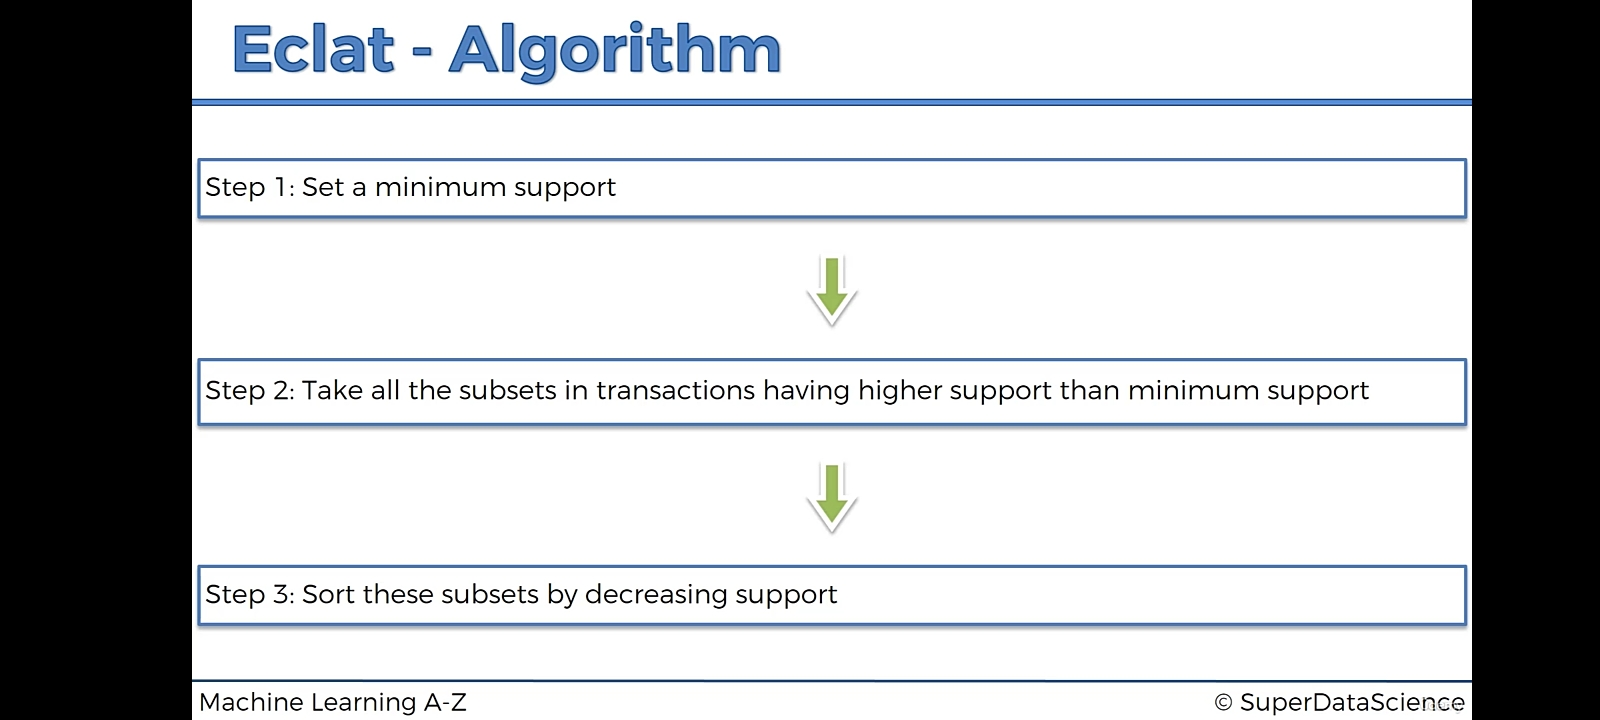

## Implementation

We have to run a offer `Buy one get one free` and for this we have to find the highest support of `two products`.

### Importing the Libraries

In [ ]:
!pip install apyori

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Preprocessing


In [ ]:
dataset = pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None)
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i, j]) for j in range(0, 20)])

### Training the Eclat model on the dataset

In [ ]:
from apyori import apriori

rules = apriori(transactions=transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)

In [ ]:
results = list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [ ]:
def inspect(results):
  lhs         =  [tuple(result[2][0][0])[0] for result in results]
  rhs         =  [tuple(result[2][0][1])[0] for result in results]
  supports    =  [result[1] for result in results]
  return list(zip(lhs, rhs, supports))

resultsInDataFrame = pd.DataFrame(inspect(results), columns = ['Product 1', 'Product 2', 'Support'])

### Displaying the results in non-sorted order.

In [ ]:
resultsInDataFrame

,Product 1,Product 2,Support
0,light cream,chicken,0.004533
1,mushroom cream sauce,escalope,0.005733
2,pasta,escalope,0.005866
3,fromage blanc,honey,0.003333
4,herb & pepper,ground beef,0.015998
5,tomato sauce,ground beef,0.005333
6,light cream,olive oil,0.003200
7,whole wheat pasta,olive oil,0.007999
8,pasta,shrimp,0.005066


### Displaying the results in Sorted order

In [ ]:
resultsInDataFrame.nlargest(n=10, columns = 'Support')

,Product 1,Product 2,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200
